In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from scipy.stats import chi2
from matplotlib import patches
font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)

df = pd.read_csv("C:/injection.csv",encoding='CP949')
print(df.head()) #head출력
print()
print('data shape = ',df.shape) #(119895행, 14열)

                    일시          도번  차수        작업지시번호  샷 아이디  PEAK압력  최소쿠션  \
0  1970-01-01 00:00:00  1031721900   0  2018020060-5      0     0.0   0.0   
1  1970-01-01 00:00:00  1031721900   0  2018020060-5   8514  1939.0  10.1   
2  2018-02-22 17:34:42  1031721300   0  2018020042-9   1199  1592.3  10.5   
3  2018-02-22 17:35:03  1031721300   0  2018020042-9   1200  1593.2  10.5   
4  2018-02-22 17:35:23  1031721300   0  2018020042-9   1201  1596.9  10.4   

   V-P위치   V-P압력  사출시간  계량시간  사이클타임  금형(상)  금형(하)  
0    0.0     0.0   0.0  0.00   0.00   16.5   16.8  
1   10.1  1899.9   2.5  1.59  17.90   16.3   17.1  
2   10.5  1550.5   2.0  1.60  20.54   16.1   16.8  
3   10.5  1549.9   2.0  1.59  20.52   16.0   16.8  
4   10.4  1550.5   2.0  1.59  20.54   16.0   16.8  

data shape =  (119895, 14)


In [2]:
df.columns #데이터프레임 열 이름 조회

Index(['일시', '도번', '차수', '작업지시번호', '샷 아이디', 'PEAK압력', '최소쿠션', 'V-P위치', 'V-P압력',
       '사출시간', '계량시간', '사이클타임', '금형(상)', '금형(하)'],
      dtype='object')

In [3]:
#데이터프레임 열 이름 바꾸기
df.rename(columns={'샷 아이디':'샷아이디'}, inplace = True)
df.rename(columns={'V-P위치':'VP위치'}, inplace = True)
df.rename(columns={'V-P압력':'VP압력'}, inplace = True)
df.rename(columns={'금형(상)':'금형상'}, inplace = True)
df.rename(columns={'금형(하)':'금형하'}, inplace = True)
df

,일시,도번,차수,작업지시번호,샷아이디,PEAK압력,최소쿠션,VP위치,VP압력,사출시간,계량시간,사이클타임,금형상,금형하
0,1970-01-01 00:00:00,1031721900,0,2018020060-5,0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,16.5,16.8
1,1970-01-01 00:00:00,1031721900,0,2018020060-5,8514,1939.0,10.1,10.1,1899.9,2.5,1.59,17.90,16.3,17.1
2,2018-02-22 17:34:42,1031721300,0,2018020042-9,1199,1592.3,10.5,10.5,1550.5,2.0,1.60,20.54,16.1,16.8
3,2018-02-22 17:35:03,1031721300,0,2018020042-9,1200,1593.2,10.5,10.5,1549.9,2.0,1.59,20.52,16.0,16.8
4,2018-02-22 17:35:23,1031721300,0,2018020042-9,1201,1596.9,10.4,10.4,1550.5,2.0,1.59,20.54,16.0,16.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119890,2018-05-01 09:17:58,1031721900,0,2018040018-6,4123,1646.6,9.5,9.5,1600.7,1.6,1.81,17.74,25.1,26.3
119891,2018-05-01 09:18:16,1031721900,0,2018040018-6,4124,1646.0,9.5,9.5,1599.3,1.6,1.80,17.74,25.2,26.2
119892,2018-05-01 09:18:34,1031721900,0,2018040018-6,4125,1644.2,9.5,9.5,1598.8,1.6,1.81,17.76,25.2,26.3
119893,2018-05-01 09:18:51,1031721900,0,2018040018-6,4126,1643.0,9.5,9.5,1599.6,1.6,1.82,17.72,25.2,26.3


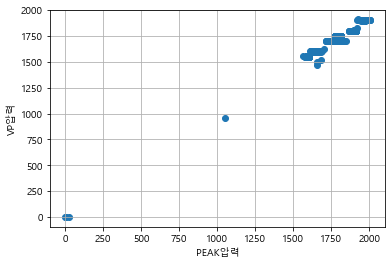

In [4]:
plt.scatter(df['PEAK압력'],df['VP압력'])
plt.xlabel('PEAK압력')
plt.ylabel('VP압력')
plt.grid()
plt.show()

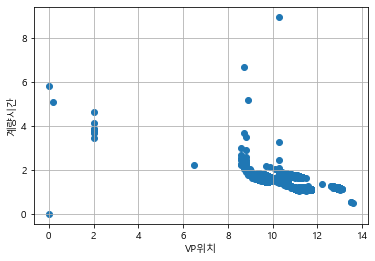

In [5]:
plt.scatter(df['VP위치'],df['계량시간'])
plt.xlabel('VP위치')
plt.ylabel('계량시간')
plt.grid()
plt.show()

# 마할라노비스 거리

In [6]:
# PEAK압력, VP압력만 numpy배열로 변환 

pre = df[['VP위치','계량시간']]
pre = pre.dropna()
pre = pre.to_numpy()

cov = np.cov(pre,rowvar=False)
print(cov) #공분산 행렬을 구해줬따.

cov_pm1 = np.linalg.matrix_power(cov,-1) #공분산 행렬을 나누기 위해서 -1제곱을 취함
print(cov_pm1)

cp = np.mean(pre, axis = 0) # PEAK압력과 VP압력 평균값을 center point를 구함 (기준값/중심점)
print(cp)

[[ 0.59446027 -0.13985304]
 [-0.13985304  0.06013371]]
[[ 3.71465644  8.63918077]
 [ 8.63918077 36.72176065]]
[10.63522916  1.4484433 ]


In [7]:
distances = [] # 거리를 저장하기 위한 array선언
# for문으로 각 데이터 거리 계산

for i, val in enumerate(pre):
    p1 = val
    p2 = cp
    distance = (p1-p2).T.dot(cov_pm1).dot(p1-p2) # 마할라노비스 공식 적용 (p1-p2).T.dot(cov_pm1) : 행렬과 벡터 곱셈
    distances.append(distance) # array에 거리값 저장
distances = np.array(distances)

print(distances)

[7.63364520e+02 4.90880408e-01 5.57289604e-01 ... 2.49573513e+00
 2.56879828e+00 2.56879828e+00]


In [13]:
# 이상치 제거를 위한 cutoff 자유도가 2(변수 개수)인 카이제곱분포 95%분위를 구하고 
cutoff = chi2.ppf(0.90, pre.shape[1]) #카이제곱분포.ppf(분포) pre.shape[1]는 열의 갯수 반환

# 이상치의 인덱스
outlierIndexes = np.where(distances > cutoff) #cutoff거리보다 먼 거리를 이상치라고 판단하고 이상치의 인덱스번호를 반환시킴

print('index outliers')
print(outlierIndexes)

print('이상치 관측값')
print(pre[distances > cutoff,:])

index outliers
(array([     0,   4855,   5725, ...,  94772, 115768, 115785], dtype=int64),)
이상치 관측값
[[0.   0.  ]
 [9.1  1.63]
 [8.9  1.8 ]
 ...
 [2.   3.74]
 [0.2  5.1 ]
 [8.9  1.89]]


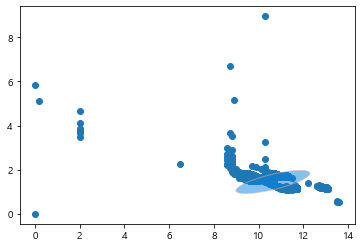

In [14]:
pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1]) #피어슨 상관계수
ell_radius_x = np.sqrt(1 + pearson)
ell_radius_y = np.sqrt(1 - pearson)
lambda_, v = np.linalg.eig(cov)
lambda_ = np.sqrt(lambda_)

# Ellipse patch
ellipse = patches.Ellipse(xy=(cp[0], cp[1]),
                  width=lambda_[0]*np.sqrt(cutoff)*2, height=lambda_[1]*np.sqrt(cutoff)*2,
                  angle=np.rad2deg(np.arccos(v[0, 0])), edgecolor='#fab1a0')
ellipse.set_facecolor('#0984e3')
ellipse.set_alpha(0.5)
fig = plt.figure()
ax = plt.subplot()
ax.add_artist(ellipse)
plt.scatter(pre[: , 0], pre[ : , 1])
plt.show()

In [15]:
outlier_idx = pd.DataFrame(outlierIndexes)
data_df = pd.DataFrame(df)#pandas DataFrame로 변환
data_df.drop(outlier_idx,axis = 0, inplace=True)

In [16]:
print(data_df)
print('data shape = ',data_df.shape) #(119895행, 14열)-> (117039, 14)

                         일시          도번  차수         작업지시번호  샷아이디  PEAK압력  \
8964    2018-02-27 01:53:46  1031720400   0  2018020002-11  4112  1987.8   
8965    2018-02-27 01:54:05  1031720400   0  2018020002-11  4113  1987.1   
8966    2018-02-27 01:54:24  1031720400   0  2018020002-11  4114  1987.3   
8967    2018-02-27 01:54:42  1031720400   0  2018020002-11  4115  1982.4   
8968    2018-02-27 01:55:01  1031720400   0  2018020002-11  4116  1987.8   
...                     ...         ...  ..            ...   ...     ...   
119890  2018-05-01 09:17:58  1031721900   0   2018040018-6  4123  1646.6   
119891  2018-05-01 09:18:16  1031721900   0   2018040018-6  4124  1646.0   
119892  2018-05-01 09:18:34  1031721900   0   2018040018-6  4125  1644.2   
119893  2018-05-01 09:18:51  1031721900   0   2018040018-6  4126  1643.0   
119894  2018-05-01 09:19:09  1031721900   0   2018040018-6  4127  1645.2   

        최소쿠션  VP위치    VP압력  사출시간  계량시간  사이클타임   금형상   금형하  
8964     9.6   9.6  1900.6 

In [12]:
data_df.to_csv('mahalanobis1.csv')